In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
filename = 'ch2_tmc_ncn_20210524T1512098273_d_img_d18.img' 

# set width and height 
w, h = 176476, 4000 

with open(filename, 'rb') as img:
    img_bytes = img.read()
len(img_bytes)

1411808000

In [18]:
img_array = np.frombuffer(img_bytes, dtype = np.uint16).reshape(w, h)
img_array.shape

(176476, 4000)

In [ ]:
#plt.imshow(img_array,origin='lower')

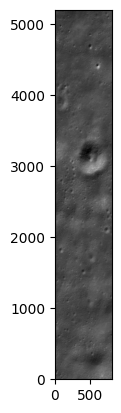

In [22]:
plt.imshow(img_array[32600:27400:-1, 2800:3600], cmap='gray', origin='lower')

another image

In [9]:
filename = 'ch2_tmc_ncn_20211111T1322553940_d_img_d18.img' 

# set width and height 
w, h = 190796, 4000 

with open(filename, 'rb') as img:
    img_bytes = img.read()
len(img_bytes)

1526368000

In [10]:
img_array = np.frombuffer(img_bytes, dtype = np.uint16).reshape(w, h)
img_array.shape

(190796, 4000)

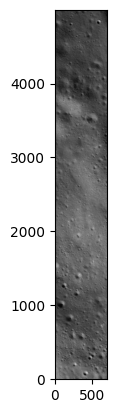

In [15]:
plt.imshow(img_array[185600:180600:-1, 500:1200], cmap='gray', origin='lower')